In [136]:
import pandas as pd

In [137]:
# df = pd.read_csv('/Users/liaopeng3/logs/google_analytics_all/train.csv')

In [138]:
from pandas.io.json import json_normalize

In [139]:
import json

In [140]:
col_select = ['device','geoNetwork','totals','trafficSource']

In [141]:
df_raw = pd.read_csv('/Users/liaopeng3/logs/google_analytics_all/train.csv',\
                  converters={cols:json.loads for cols in col_select},dtype={'fullVisitorId': 'str'},header=0)

In [ ]:
df3 = df_raw.copy()

In [142]:
for cols in col_select:
    column_as_df = json_normalize(df3[cols])
    column_as_df.columns = [f"{cols}.{subcolumn}" for subcolumn in column_as_df.columns]
    df3 = df3.drop(cols,axis=1)
    df3 = df3.merge(column_as_df,left_index=True,right_index=True)

In [143]:
# df3=pd.read_csv('/Users/liaopeng3/logs/google_analytics_all/train_df_3.csv',dtype={'fullVisitorId': 'str'})

In [144]:
df3.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


In [145]:
df3.shape

(903653, 55)

In [146]:
cols_drop = []
for cols in df3.columns:
    if df3[cols].nunique()==1:
        print(cols)
        cols_drop.append(cols)

socialEngagementType
device.browserSize
device.browserVersion
device.flashVersion
device.language
device.mobileDeviceBranding
device.mobileDeviceInfo
device.mobileDeviceMarketingName
device.mobileDeviceModel
device.mobileInputSelector
device.operatingSystemVersion
device.screenColors
device.screenResolution
geoNetwork.cityId
geoNetwork.latitude
geoNetwork.longitude
geoNetwork.networkLocation
totals.bounces
totals.newVisits
totals.visits
trafficSource.adwordsClickInfo.criteriaParameters
trafficSource.adwordsClickInfo.isVideoAd
trafficSource.campaignCode
trafficSource.isTrueDirect


In [147]:
df3 = df3.drop(cols_drop,axis=1)

# Format the Numerous Variables

In [152]:
list_v = ['totals.hits','totals.pageviews','trafficSource.adwordsClickInfo.page']

In [153]:
for cols in list_v:
    df3[cols]=df3[cols].astype(float)

In [154]:
df3.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'device.browser',
       'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'totals.hits', 'totals.pageviews',
       'totals.transactionRevenue', 'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.keyword', 'trafficSource.medium',
       'trafficSource.referralPath', 'trafficSource.source',
       'formated_visitStartTime', 'visitStartTime2'],
      dtype='object')

In [155]:
df3.dtypes

channelGrouping                                         object
date                                                     int64
fullVisitorId                                           object
sessionId                                               object
visitId                                                  int64
visitNumber                                              int64
visitStartTime                                           int64
device.browser                                          object
device.deviceCategory                                   object
device.isMobile                                           bool
device.operatingSystem                                  object
geoNetwork.city                                         object
geoNetwork.continent                                    object
geoNetwork.country                                      object
geoNetwork.metro                                        object
geoNetwork.networkDomain                               

In [156]:
df3.loc[1020:1025,['visitId','fullVisitorId']]

,visitId,fullVisitorId
1020,1472853233,6712520540378436905
1021,1472880837,4111636069257027886
1022,1472828860,3152246617474456269
1023,1472824904,1856749147915772585
1024,1472822104,0343138238061206334
1025,1472840887,0026203741366904270


# Fill Null Cells with Most Frequent Value

In [157]:
# for cols in df3.columns:
#     if df3[cols].isna().sum()>0:
#         val_tmp = df3[cols].mode()[0]
#         df3[cols]=df3[cols].fillna(value=val_tmp)
    

# Convert the Object Values to Numeric

In [158]:
for cols in df3.columns:
    if df3[cols].dtypes == 'O':
#         df3[cols] = df3[cols].astype('category')
#         df3["new_"+cols] = df3[cols].cat.codes
        df3["new_"+cols] = pd.factorize( df3[cols])[0]
        df3 = df3.drop(cols,axis=1)
        df3 = df3.rename(columns={"new_"+cols:cols})

# Convert Date to Numeric Variables

In [159]:
df3.head()

,date,visitId,visitNumber,visitStartTime,device.isMobile,totals.hits,totals.pageviews,trafficSource.adwordsClickInfo.page,visitStartTime2,channelGrouping,...,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,formated_visitStartTime
0,20160902,1472830385,1,1472830385,False,1.0,1.0,NaN,2016-09-02 15:33:05,0,...,-1,-1,-1,-1,0,0,0,-1,0,0
1,20160902,1472880147,1,1472880147,False,1.0,1.0,NaN,2016-09-03 05:22:27,0,...,-1,-1,-1,-1,0,0,0,-1,0,1
2,20160902,1472865386,1,1472865386,False,1.0,1.0,NaN,2016-09-03 01:16:26,0,...,-1,-1,-1,-1,0,0,0,-1,0,2
3,20160902,1472881213,1,1472881213,False,1.0,1.0,NaN,2016-09-03 05:40:13,0,...,-1,-1,-1,-1,0,1,0,-1,0,3
4,20160902,1472822600,2,1472822600,True,1.0,1.0,NaN,2016-09-02 13:23:20,0,...,-1,-1,-1,-1,0,0,0,-1,0,4


In [161]:
df3['date'] = pd.to_datetime(df3['date'])

In [162]:
df3['date_dayofweek'] = df3['date'].dt.dayofweek
df3['date_year'] = df3['date'].dt.year

In [163]:
df3['date_hour'] = df3['date'].dt.hour

In [164]:
df3['date_month'] = df3['date'].dt.month
df3['date_day'] = df3['date'].dt.day

In [166]:
df3['date_month'] = df3['date'].apply(lambda x:x.month)
df3['date_quarter_month'] = df3['date'].apply(lambda x:x.day//8)
df3['date_weekday'] = df3['date'].apply(lambda x:x.weekday())


In [148]:
df3 = df3.drop('date',axis=1)

# Visit Time

In [169]:
df3['visitStartTime'] = pd.to_datetime(df3['visitStartTime'],unit='s')

In [170]:
df3.head()

,date,visitId,visitNumber,visitStartTime,device.isMobile,totals.hits,totals.pageviews,trafficSource.adwordsClickInfo.page,visitStartTime2,channelGrouping,...,trafficSource.referralPath,trafficSource.source,formated_visitStartTime,date_dayofweek,date_year,date_hour,date_month,date_day,date_quarter_month,date_weekday
0,1970-01-01 00:00:00.020160902,1472830385,1,2016-09-02 15:33:05,False,1.0,1.0,NaN,2016-09-02 15:33:05,0,...,-1,0,0,3,1970,0,1,1,0,3
1,1970-01-01 00:00:00.020160902,1472880147,1,2016-09-03 05:22:27,False,1.0,1.0,NaN,2016-09-03 05:22:27,0,...,-1,0,1,3,1970,0,1,1,0,3
2,1970-01-01 00:00:00.020160902,1472865386,1,2016-09-03 01:16:26,False,1.0,1.0,NaN,2016-09-03 01:16:26,0,...,-1,0,2,3,1970,0,1,1,0,3
3,1970-01-01 00:00:00.020160902,1472881213,1,2016-09-03 05:40:13,False,1.0,1.0,NaN,2016-09-03 05:40:13,0,...,-1,0,3,3,1970,0,1,1,0,3
4,1970-01-01 00:00:00.020160902,1472822600,2,2016-09-02 13:23:20,True,1.0,1.0,NaN,2016-09-02 13:23:20,0,...,-1,0,4,3,1970,0,1,1,0,3


In [171]:
df3['quarter_month'] = df3['visitStartTime'].apply(lambda x:x.day//8)

In [172]:
df3.loc[1020:1025,['visitStartTime','quarter_month']]

,visitStartTime,quarter_month
1020,2016-09-02 21:53:53,0
1021,2016-09-03 05:33:57,0
1022,2016-09-02 15:07:40,0
1023,2016-09-02 14:01:44,0
1024,2016-09-02 13:15:04,0
1025,2016-09-02 18:28:07,0


In [173]:
df3['day_month'] = df3['visitStartTime'].apply(lambda x:x.day)


In [174]:
df3['WoY'] = df3['visitStartTime'].apply(lambda x: x.isocalendar()[1])

In [175]:
df3['visit_dayofweek'] = df3['visitStartTime'].dt.dayofweek
df3['visit_year'] = df3['visitStartTime'].dt.year

In [176]:
df3['visit_month'] = df3['visitStartTime'].dt.month
df3['visit_day'] = df3['visitStartTime'].dt.day
df3['visit_hour'] = df3['visitStartTime'].dt.hour

In [177]:
df3['visitStartTime'] = df3.visitStartTime.map( lambda x: pd.to_datetime(x).hour )

In [178]:
df3 = df3.drop('visitStartTime',axis=1)

In [193]:
# df3 = df3.drop('formated_visitStartTime',axis=1)

# Convert the BOOL Values

In [179]:
df3['device.isMobile'].dtypes

dtype('bool')

In [180]:
for cols in df3.columns:
    if df3[cols].dtypes=='bool':
        df3['new_'+cols]=df3[cols].apply(lambda x: 1 if x else 0)
        df3=df3.drop(cols,axis=1)
        df3 = df3.rename(columns={'new_'+cols:cols})

# Clean the Data Again

In [181]:
cols_drop = []
for cols in df3.columns:
    if df3[cols].nunique()==1:
        print(cols)
        cols_drop.append(cols)
        
df3 = df3.drop(cols_drop,axis=1)

date_dayofweek
date_year
date_hour
date_month
date_day
date_quarter_month
date_weekday


# Baseline Model

In [182]:
train_x = df3.drop(['totals.transactionRevenue','sessionId','visitId'],axis=1)
train_y = df3['totals.transactionRevenue'].fillna(0)

In [183]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=2, random_state=0,
                             n_estimators=100)
# model=regr.fit(train_x, train_y)


In [184]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return rmse

In [185]:
from sklearn.metrics import mean_squared_error

In [186]:
import numpy as np

In [187]:
# calc_train_error(train_x, train_y, model)

In [188]:
param = {'num_leaves': 300,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.005,
         "min_child_samples": 20,
         "boosting": "rf",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.8 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 1,
         "verbosity": -1}

In [189]:
import lightgbm as lgb

In [190]:
from sklearn.model_selection import KFold
import time

In [194]:
folds = KFold(n_splits=5, shuffle=True, random_state=15)
oof = np.zeros(len(df3))
predictions = np.zeros(len(df3))
start = time.time()
features = list(train_x.columns)
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_x.values, train_y.values)):
    trn_data = lgb.Dataset(train_x.iloc[trn_idx].values, label=train_y.iloc[trn_idx].values)
    val_data = lgb.Dataset(train_x.iloc[val_idx].values, label=train_y.iloc[val_idx].values)
    
    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=100, early_stopping_rounds = 100)
    oof[val_idx] = clf.predict(train_x.iloc[val_idx].values, num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(train_x.values, num_iteration=clf.best_iteration) / folds.n_splits

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [79]:
import matplotlib.pyplot as plt

In [80]:
import seaborn as sns

/Users/liaopeng3/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


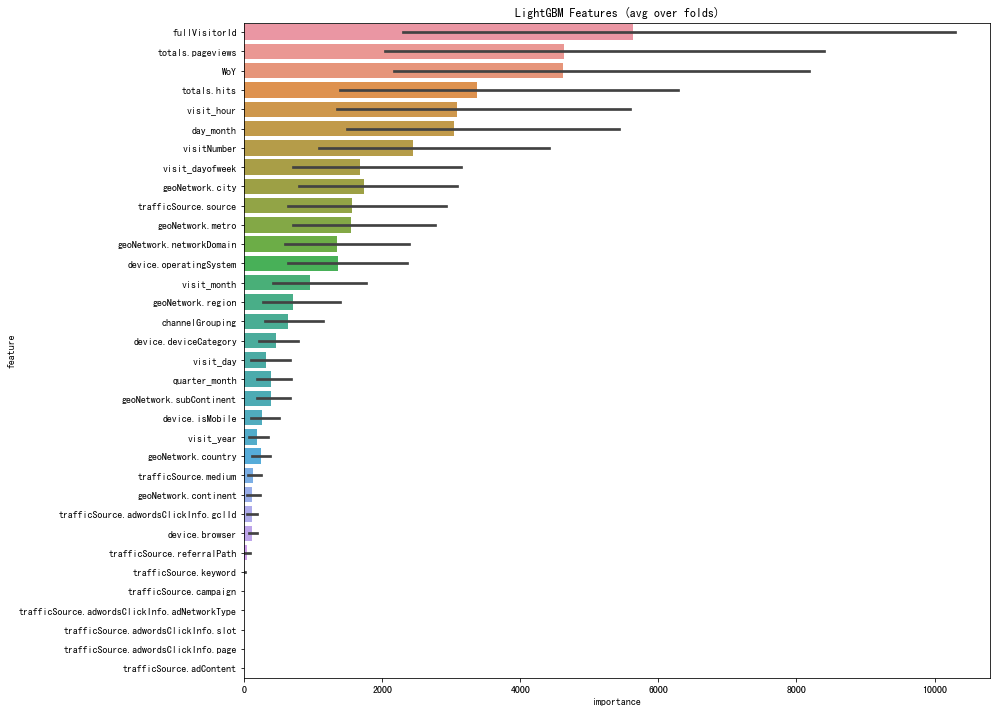

In [81]:
cols = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(
    by="importance", ascending=False)[:1000].index

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,10))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')